In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from datetime import timedelta

In [60]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D

In [4]:
df_ct = pd.read_csv('./data/시티랩스_모델데이터.csv',index_col=0)
df_ct.head()

,일자,종가,등락률,거래대금,매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),...,EPS(원),BPS(원),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
1,2016-01-05,3020,0.00,-0.452066,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.88,-0.913043,-0.176471,-0.200000,-3.000000,8.000000,-0.250000,0.0
2,2016-01-06,2895,-4.14,0.292444,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.88,16.000000,-0.071429,1.250000,-2.750000,-0.388889,4.333333,0.0
3,2016-01-07,2945,1.73,0.843234,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.88,-0.088235,2.615385,0.155556,-1.761905,0.909091,-0.843750,0.0
4,2016-01-08,2920,-0.85,-0.546023,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.88,-0.870968,-0.829787,-0.288462,-0.750000,0.571429,4.800000,0.0
5,2016-01-11,2810,-3.77,-0.349444,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.88,5.250000,-0.375000,-0.270270,-6.000000,-0.939394,-0.241379,0.0


In [5]:
 df_ct.columns

Index(['일자', '종가', '등락률', '거래대금', '매출액(억원)', '영업이익(억원)', '당기순이익(억원)',
       '지배주주순이익(억원)', '자산총계(억원)', '부채총계(억원)', '자본총계(억원)', '자본금(억원)', '부채비율(%)',
       '영업이익률(%)', '지배주주순이익률(%)', 'ROA(%)', 'ROE(%)', 'EPS(원)', 'BPS(원)',
       'PBR(배)', '고가-종가', '고가-시가', '고가-저가', '종가-시가', '종가-저가', '시가-저가',
       '전환사채전환총액'],
      dtype='object')

In [6]:
df_ct1 = df_ct[['등락률', '거래대금', '부채비율(%)','영업이익률(%)', '지배주주순이익률(%)', 'ROA(%)',
                'ROE(%)','PBR(배)', '고가-종가', '고가-시가', '고가-저가', '종가-시가', '종가-저가', '시가-저가','전환사채전환총액']]

In [7]:
df_ct1.head(3)

,등락률,거래대금,부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
1,0.00,-0.452066,83.63,-3.57,-2.51,-2.0,-3.59,1.88,-0.913043,-0.176471,-0.200000,-3.000000,8.000000,-0.250000,0.0
2,-4.14,0.292444,83.63,-3.57,-2.51,-2.0,-3.59,1.88,16.000000,-0.071429,1.250000,-2.750000,-0.388889,4.333333,0.0
3,1.73,0.843234,83.63,-3.57,-2.51,-2.0,-3.59,1.88,-0.088235,2.615385,0.155556,-1.761905,0.909091,-0.843750,0.0


In [23]:
for i in range(len(df_ct1.columns)):
    
    if np.inf in df_ct1.iloc[:,i].unique():
        print(i)  
        
    else:
        print('없음')

없음
1
없음
없음
없음
없음
없음
없음
없음
없음
없음
없음
없음
없음
없음


In [30]:
df_ct1[df_ct1.거래대금 == np.inf]

,등락률,거래대금,부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
275,-11.63,inf,40.97,1.21,3.12,3.40,5.12,1.82,-1.090116,39.0,324.0,-1.078488,-0.995640,284.0,0.0
281,-7.62,inf,40.97,1.21,3.12,3.40,5.12,1.82,-1.068254,99.0,214.0,-1.036508,-0.999683,114.0,0.0
501,-2.35,inf,140.52,-12.65,-12.21,-4.42,-9.40,3.12,-1.239216,359.0,1339.0,-1.168627,-0.976471,979.0,0.0
1100,-8.92,inf,93.59,6.01,-4.47,0.50,-25.01,1.52,-1.069231,22.0,45.0,-1.033846,-0.998462,22.0,0.0


In [33]:
df_ct2 = df_ct1[df_ct1.거래대금 != np.inf]
df_ct2.head()

,등락률,거래대금,부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
1,0.00,-0.452066,83.63,-3.57,-2.51,-2.0,-3.59,1.88,-0.913043,-0.176471,-0.200000,-3.000000,8.000000,-0.250000,0.0
2,-4.14,0.292444,83.63,-3.57,-2.51,-2.0,-3.59,1.88,16.000000,-0.071429,1.250000,-2.750000,-0.388889,4.333333,0.0
3,1.73,0.843234,83.63,-3.57,-2.51,-2.0,-3.59,1.88,-0.088235,2.615385,0.155556,-1.761905,0.909091,-0.843750,0.0
4,-0.85,-0.546023,83.63,-3.57,-2.51,-2.0,-3.59,1.88,-0.870968,-0.829787,-0.288462,-0.750000,0.571429,4.800000,0.0
5,-3.77,-0.349444,83.63,-3.57,-2.51,-2.0,-3.59,1.88,5.250000,-0.375000,-0.270270,-6.000000,-0.939394,-0.241379,0.0


In [34]:
df_ct2.shape

(1470, 15)

In [113]:
window_size = 20
target_period = 5

X = []
Y = []


for i in range(len(df_ct2) - window_size): 
    
    # 피쳐값 
    X.append([df_ct2.iloc[i+j,1:] for j in range(window_size)]) # j= 0부터 29 -> 30일치 데이터

    # 등락률 
    Y.append([df_ct2.iloc[i+j,0] for j in range(target_period)])
    
Y1 = []
for y in Y:
    toggle = 0
    for i in y:

        if i >= 5:
            Y1.append(1)
            toggle = 1
            break
    if toggle != 1:
        Y1.append(0)


In [114]:
X_ary = np.array(X).astype(float)
Y1_ary = np.array(Y1).astype(float)

In [115]:
train_test_split = 1200

x_train = X_ary[:1200]
y_train = Y1_ary[:1200]

x_test = X_ary[1200:]
y_test = Y1_ary[1200:]

In [116]:
x_train.shape

(1200, 20, 14)

In [117]:
with tf.device('/GPU:0'):
    model = Sequential()
    model.add(LSTM(100, input_shape=(20,14)))
    model.add(Dense(1,activation='sigmoid'))
    model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100)               46000     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 46,101
Trainable params: 46,101
Non-trainable params: 0
_________________________________________________________________


In [118]:
# learning rate 설정
Adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [119]:
model.compile(loss='binary_crossentropy', metrics ='accuracy', optimizer=Adam)

In [120]:
hist = model.fit(x_train, y_train, epochs=100, batch_size= 10, validation_data= (x_test,y_test))

Epoch 1/100
120/120 [==============================] - 2s 8ms/step - loss: 0.5886 - accuracy: 0.6917 - val_loss: 0.5340 - val_accuracy: 0.8120
Epoch 2/100
120/120 [==============================] - 1s 5ms/step - loss: 0.5060 - accuracy: 0.7367 - val_loss: 0.5197 - val_accuracy: 0.7960
Epoch 3/100
120/120 [==============================] - 1s 5ms/step - loss: 0.4532 - accuracy: 0.7883 - val_loss: 0.5365 - val_accuracy: 0.7960
Epoch 4/100
120/120 [==============================] - 1s 5ms/step - loss: 0.4225 - accuracy: 0.8008 - val_loss: 0.4623 - val_accuracy: 0.8000
Epoch 5/100
120/120 [==============================] - 1s 5ms/step - loss: 0.3933 - accuracy: 0.8325 - val_loss: 0.4958 - val_accuracy: 0.8160
Epoch 6/100
120/120 [==============================] - 1s 5ms/step - loss: 0.3583 - accuracy: 0.8525 - val_loss: 0.4859 - val_accuracy: 0.7720
Epoch 7/100
120/120 [==============================] - 1s 5ms/step - loss: 0.3308 - accuracy: 0.8592 - val_loss: 0.4459 - val_accuracy: 0.8200

Epoch 58/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0328 - accuracy: 0.9883 - val_loss: 0.9890 - val_accuracy: 0.8280
Epoch 59/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0320 - accuracy: 0.9908 - val_loss: 0.9340 - val_accuracy: 0.8280
Epoch 60/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0253 - accuracy: 0.9925 - val_loss: 0.9813 - val_accuracy: 0.8120
Epoch 61/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0245 - accuracy: 0.9908 - val_loss: 0.9992 - val_accuracy: 0.8400
Epoch 62/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0240 - accuracy: 0.9942 - val_loss: 0.9625 - val_accuracy: 0.8200
Epoch 63/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0218 - accuracy: 0.9925 - val_loss: 0.9502 - val_accuracy: 0.8160
Epoch 64/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0270 - accuracy: 0.9933 - val_loss: 0.9244 - val_accuracy:

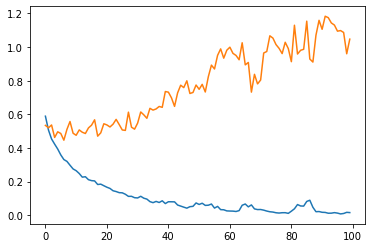

In [121]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

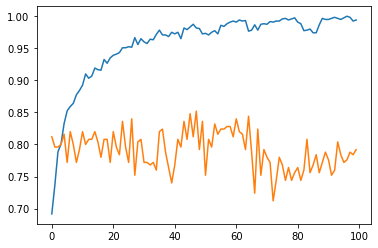

In [122]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [59]:
model.save('./data/model/시티랩스_10,5.h5')

In [61]:
model1 =  keras.models.load_model('./data/model/시티랩스_10,5.h5')

In [63]:
model1.evaluate(x_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 0.2809 - accuracy: 0.9269


[0.2809010148048401, 0.9269230961799622]

In [66]:
from sklearn.metrics import classification_report


In [71]:
pred = model1.predict(x_test)
len(pred)

260

In [77]:
x_test[0]

array([[ -0.11271809,  64.33      ,  13.2       ,   5.47      ,
         -5.51      , -34.11      ,   2.53      ,   0.6       ,
         -0.88888889,  -0.1       ,  -2.75      ,  -0.8       ,
          7.        ,   0.        ],
       [  1.10626833,  64.33      ,  13.2       ,   5.47      ,
         -5.51      , -34.11      ,   2.53      ,   0.875     ,
          7.        ,   0.88888889,   0.        ,   1.        ,
          0.125     ,   0.        ],
       [ -0.31183154,  64.33      ,  13.2       ,   5.47      ,
         -5.51      , -34.11      ,   2.53      ,  -0.4       ,
         -0.875     ,  -0.11764706,   0.14285714,   2.        ,
          0.55555556,   0.        ],
       [ -0.33952301,  64.33      ,  13.2       ,   5.47      ,
         -5.51      , -34.11      ,   2.53      ,  -0.88888889,
          3.        ,  -0.13333333,  -1.375     ,   1.        ,
         -0.35714286,   0.        ],
       [  0.07049544,  64.33      ,  13.2       ,   5.47      ,
         -5.51      

In [78]:
pred

array([[0.27711883],
       [0.28975993],
       [0.2950392 ],
       [0.26821   ],
       [0.27821267],
       [0.25682333],
       [0.27000904],
       [0.3360014 ],
       [0.30496275],
       [0.25823504],
       [0.21957578],
       [0.2493262 ],
       [0.25572896],
       [0.19824457],
       [0.17159674],
       [0.21405753],
       [0.18904315],
       [0.16010791],
       [0.1608472 ],
       [0.15101022],
       [0.13397981],
       [0.11976197],
       [0.11132117],
       [0.11762336],
       [0.10853408],
       [0.10280783],
       [0.07385399],
       [0.06087089],
       [0.08116091],
       [0.08103109],
       [0.08082778],
       [0.09232912],
       [0.09211715],
       [0.08920299],
       [0.09112186],
       [0.10173703],
       [0.08801971],
       [0.10091133],
       [0.1033345 ],
       [0.09676921],
       [0.10721759],
       [0.10871453],
       [0.09983931],
       [0.10090475],
       [0.09930041],
       [0.09386507],
       [0.0978376 ],
       [0.080

In [86]:
ans = []
for i in pred:
    ans.append(round(i[0]))

In [88]:
Counter(ans)

Counter({0: 260})

In [79]:
len(y_test)

260

In [81]:
from collections import Counter
Counter(y_test)


Counter({0.0: 241, 1.0: 19})